In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import admix_prs

In [3]:
# Constants
# 25% hsq for BMI, 50% hsq for height
trait = "bmi"
var_e = 0.75
PHENO_PATH = "/u/project/pasaniuc/kangchen/tmp/prs-1219/REAL-PHENO/all-pheno.csv"
TRAIT_PATH = f"/u/project/pasaniuc/kangchen/tmp/prs-1219/REAL-PHENO/{trait}.raw.pheno"
PRS_PATH = f"/u/project/pasaniuc/kangchen/tmp/prs-1219/REAL-PRS/{trait}.tsv.gz"

In [4]:
# df_prs only has pheno_g results, but real-pheno only has pheno
# 1.645 = 90%
# QUANTILE_5 = prs_low, QUANTILE_95 = prs_upp
df_prs = pd.read_csv(PRS_PATH, sep="\t")
df_prs["indiv"] = df_prs["indiv"].apply(lambda x: x.split("_")[0])
df_prs = df_prs.set_index("indiv")
df_prs["MEAN"] -= df_prs["MEAN"].mean()
df_prs = df_prs.dropna()
df_prs.index = df_prs.index.astype(int)
df_prs["PHENO_STD"] = np.sqrt(df_prs["SD"] ** 2 + var_e)
df_prs["PHENO"] = df_prs["MEAN"] + df_prs["PHENO_STD"]
df_prs["PHENO_LOW"] = df_prs["MEAN"] - 1.645 * df_prs["PHENO_STD"]
df_prs["PHENO_UPP"] = df_prs["MEAN"] + 1.645 * df_prs["PHENO_STD"]
df_prs

,MEAN,SD,QUANTILE_5,QUANTILE_10,QUANTILE_15,QUANTILE_20,QUANTILE_25,QUANTILE_30,QUANTILE_35,QUANTILE_40,...,QUANTILE_70,QUANTILE_75,QUANTILE_80,QUANTILE_85,QUANTILE_90,QUANTILE_95,PHENO_STD,PHENO,PHENO_LOW,PHENO_UPP
indiv,,,,,,,,,,,,,,,,,,,,,
4305423,0.426943,0.48757,-0.16516,0.04499,0.17383,0.29983,0.37615,0.44806,0.50610,0.56655,...,0.90809,1.00511,1.09551,1.17859,1.32097,1.43672,0.993843,1.420787,-1.207929,2.061816
4360126,0.743493,0.50179,0.13346,0.35639,0.50398,0.58972,0.67841,0.74536,0.80782,0.85888,...,1.23073,1.31662,1.38882,1.49347,1.62518,1.86918,1.000896,1.744390,-0.902981,2.389968
4187429,-0.256827,0.48639,-0.84952,-0.63838,-0.49048,-0.37840,-0.30370,-0.24470,-0.18461,-0.13517,...,0.22576,0.31532,0.41725,0.49668,0.62957,0.75810,0.993265,0.736438,-1.890747,1.377094
1004389,-0.463227,0.48206,-0.97483,-0.82356,-0.72624,-0.60168,-0.52469,-0.45981,-0.41332,-0.35368,...,0.03513,0.09505,0.15594,0.27193,0.43515,0.61574,0.991152,0.527925,-2.093671,1.167218
1387182,0.103233,0.49115,-0.49718,-0.28930,-0.18445,-0.07302,0.00709,0.09231,0.16953,0.22288,...,0.62524,0.68775,0.80267,0.86993,0.98681,1.11161,0.995605,1.098838,-1.534536,1.741003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498323,-0.089127,0.48179,-0.63911,-0.44585,-0.35012,-0.25852,-0.18104,-0.10259,-0.03572,0.05684,...,0.39136,0.45891,0.53437,0.64598,0.78231,0.94248,0.991020,0.901894,-1.719355,1.541102
4386997,0.472563,0.48804,-0.03869,0.09910,0.22120,0.30718,0.38144,0.45492,0.53686,0.59652,...,0.98634,1.07220,1.13859,1.20815,1.28696,1.49401,0.994074,1.466637,-1.162688,2.107815
4647541,0.228153,0.48941,-0.35322,-0.14627,-0.03681,0.07501,0.16651,0.24425,0.30513,0.37026,...,0.70734,0.78434,0.86506,0.98754,1.08589,1.26673,0.994747,1.222901,-1.408206,1.864513


In [24]:
df_trait_pheno = pd.read_csv(TRAIT_PATH, sep="\t")
df_trait_pheno.index = df_trait_pheno["FID"]
df_trait_pheno = df_trait_pheno.drop(columns=["FID"])
df_trait_pheno = df_trait_pheno.dropna()
df_trait_pheno = df_trait_pheno.rename(columns={"PHENO": "REAL"})
df_trait_pheno.index = df_trait_pheno.index.astype(int)
df_trait_pheno

,IID,REAL
FID,,
1000011,1000011,24.0
1000026,1000026,32.4
1000032,1000032,26.1
1000044,1000044,22.1
1000058,1000058,31.4
...,...,...
6026111,6026111,34.8
6026126,6026126,28.7
6026132,6026132,28.7


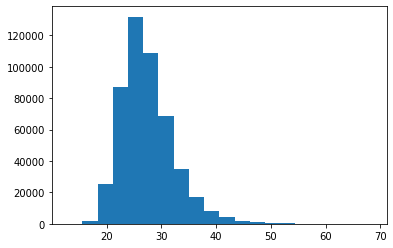

In [25]:
import matplotlib.pyplot as plt
plt.hist(df_trait_pheno["REAL"], bins=20)
plt.show()

(array([8.0000e+00, 2.5000e+01, 1.5800e+02, 9.7500e+02, 5.6750e+03,
        2.0656e+04, 5.1597e+04, 8.5596e+04, 1.0470e+05, 8.8918e+04,
        6.3690e+04, 3.5912e+04, 1.8908e+04, 8.9420e+03, 4.0570e+03,
        1.7060e+03, 5.8600e+02, 1.8500e+02, 6.2000e+01, 1.5000e+01]),
 array([2.54944517, 2.63324155, 2.71703794, 2.80083432, 2.8846307 ,
        2.96842708, 3.05222347, 3.13601985, 3.21981623, 3.30361262,
        3.387409  , 3.47120538, 3.55500176, 3.63879815, 3.72259453,
        3.80639091, 3.89018729, 3.97398368, 4.05778006, 4.14157644,
        4.22537282]),
 <BarContainer object of 20 artists>)

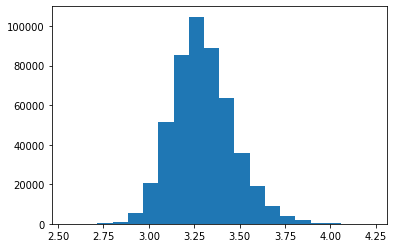

In [26]:
plt.hist(df_trait_pheno["REAL"].apply(lambda x: np.log(x)), bins=20)

In [27]:
from scipy import stats
stats.lognorm.fit(df_trait_pheno["REAL"], loc=0)

(0.28083646239801385, 10.950744138544675, 15.84004406925579)

In [33]:
# real center at 0
# real std = 1
df_trait_pheno["REAL"] = df_trait_pheno["REAL"].apply(lambda x: np.log(x))
df_trait_pheno["REAL"] -= df_trait_pheno["REAL"].mean()
df_trait_pheno["REAL"] /= df_trait_pheno["REAL"].std()

In [37]:
df_trait_pheno["REAL"]

FID
1000011   -0.717254
1000026    1.084983
1000032   -0.213516
1000044   -1.212554
1000058    0.896711
             ...   
6026111    1.514120
6026126    0.356765
6026132    0.356765
6026144    0.460487
6026158    0.293660
Name: REAL, Length: 492371, dtype: float64

In [38]:
df_pheno = pd.read_csv(PHENO_PATH, index_col=0)
df_pheno = df_pheno.dropna()
df_pheno.index = df_pheno.index.astype(int)
df_pheno

,SEX,AGE,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC38,PC39,PC40,height,SIRE,bmi,cholesterol,hdl_cholesterol,ldl_direct,dilution_factor
ID,,,,,,,,,,,,,,,,,,,,,
1000011,0,43,-12.16240,3.43848,-1.904560,4.855460,1.263630,-0.402053,-1.003270,-4.033580,...,0.131277,-0.462365,-0.981541,165.0,1001.0,24.0,6.006,1.438,3.769,1.004240
1000026,0,57,-9.94105,3.05703,-0.466343,-2.081500,-7.125890,-1.990820,0.906184,-1.355140,...,-4.511990,-1.329650,1.005220,156.0,1001.0,32.4,5.703,1.302,3.620,0.995665
1000032,1,64,-14.61760,3.54024,-3.521440,6.759100,7.999590,-2.824470,1.418720,-1.603100,...,-3.889370,-2.317630,-3.135760,182.0,1001.0,26.1,9.082,1.752,6.113,1.001040
1000044,0,47,6.68544,-2.91200,13.416200,-45.251300,10.064700,-6.174340,-16.192900,-9.641410,...,-3.764240,-0.342686,2.426050,163.0,1002.0,22.1,5.379,2.006,2.963,1.001770
1000058,1,53,-9.97432,2.29831,-1.265110,3.144700,0.931964,1.203180,-2.403660,0.584553,...,8.085970,1.463680,-0.953686,169.0,1001.0,31.4,5.046,0.691,3.389,0.996603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026109,0,51,66.83690,-97.44150,76.696900,8.725340,1.617460,4.356520,2.250150,4.204580,...,0.764100,3.065670,5.149090,156.0,3004.0,25.1,4.565,1.311,2.790,1.003060
6026111,1,63,-12.75140,4.24704,-4.756570,-0.347158,-4.576120,-0.720132,1.471440,-1.652470,...,-0.974897,4.266080,-4.613020,168.0,1001.0,34.8,6.335,1.641,3.990,0.999714
6026126,1,49,-11.22710,4.09981,2.824300,-3.649090,-7.239380,0.755878,2.896370,-3.185470,...,-1.596750,-0.390566,-7.186620,175.0,1001.0,28.7,3.073,0.909,1.814,0.992945


In [39]:
df_info = pd.merge(
    df_pheno[["SEX","AGE","PC1","PC2"]], df_trait_pheno["REAL"], 
    left_index=True, right_index=True
)
df_info = pd.merge(
    df_info, df_prs[["PHENO","PHENO_STD","PHENO_LOW","PHENO_UPP"]],
    left_index=True, right_index=True
)
df_info["PC1_Q"] = admix_prs.make_levels(df_info, stratify_col="PC1", n_level=5)
df_info["PC2_Q"] = admix_prs.make_levels(df_info, stratify_col="PC2", n_level=5)
df_info["AGE_Q"] = admix_prs.make_levels(df_info, stratify_col="AGE", n_level=5)
df_info

,SEX,AGE,PC1,PC2,REAL,PHENO,PHENO_STD,PHENO_LOW,PHENO_UPP,PC1_Q,PC2_Q,AGE_Q
1000011,0,43,-12.16240,3.43848,-0.717254,0.441758,0.983915,-2.160697,1.076384,"(-12.615, -11.687]","(3.219, 4.069]","(37.999, 48.0]"
1000026,0,57,-9.94105,3.05703,1.084983,1.137121,0.977167,-1.447487,1.767393,"(-10.336, 419.396]","(2.108, 3.219]","(55.0, 60.0]"
1000032,1,64,-14.61760,3.54024,-0.213516,1.139544,1.000360,-1.506409,1.784776,"(-19.271, -13.616]","(3.219, 4.069]","(60.0, 64.0]"
1000044,0,47,6.68544,-2.91200,-1.212554,1.024935,0.991531,-1.597666,1.664472,"(-10.336, 419.396]","(-282.318, 2.108]","(37.999, 48.0]"
1000058,1,53,-9.97432,2.29831,0.896711,1.610546,0.996563,-1.025363,2.253329,"(-10.336, 419.396]","(2.108, 3.219]","(48.0, 55.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
6026109,0,51,66.83690,-97.44150,-0.448130,0.770354,1.000681,-1.876446,1.415793,"(-10.336, 419.396]","(-282.318, 2.108]","(48.0, 55.0]"
6026111,1,63,-12.75140,4.24704,1.514120,1.424963,0.986940,-1.185493,2.061540,"(-13.616, -12.615]","(4.069, 5.038]","(60.0, 64.0]"
6026126,1,49,-11.22710,4.09981,0.356765,0.996755,1.001001,-1.650894,1.642401,"(-11.687, -10.336]","(4.069, 5.038]","(48.0, 55.0]"
6026144,1,41,-13.48330,3.44693,0.460487,1.605563,0.991239,-1.016265,2.244912,"(-13.616, -12.615]","(3.219, 4.069]","(37.999, 48.0]"


In [40]:
res_dict = {
    'r2': {
        'PHENO': {'PC1_Q': list(), 'PC2_Q':list(), 'AGE_Q':list(), 'SEX_Q':list()}    
    },
    'cali':{

        'PHENO': {'PC1_Q': list(), 'PC2_Q':list(), 'AGE_Q':list(), 'SEX_Q':list()}    
    }
}

In [41]:
res_dict['r2']['PHENO']['PC1_Q'].append(admix_prs.stratify_calculate_r2(df_info, x_col="PHENO", y_col="REAL", group_col="PC1_Q"))
res_dict['r2']['PHENO']['PC2_Q'].append(admix_prs.stratify_calculate_r2(df_info, x_col="PHENO", y_col="REAL", group_col="PC2_Q"))
res_dict['r2']['PHENO']['SEX_Q'].append(admix_prs.stratify_calculate_r2(df_info, x_col="PHENO", y_col="REAL", group_col="SEX"))
res_dict['r2']['PHENO']['AGE_Q'].append(admix_prs.stratify_calculate_r2(df_info, x_col="PHENO", y_col="REAL", group_col="AGE_Q"))
res_dict['cali']['PHENO']['PC1_Q'].append(admix_prs.eval_calibration(df_info, x_col="REAL", lower_col="PHENO_LOW", upper_col="PHENO_UPP", group_col="PC1_Q"))
res_dict['cali']['PHENO']['PC2_Q'].append(admix_prs.eval_calibration(df_info, x_col="REAL", lower_col="PHENO_LOW", upper_col="PHENO_UPP", group_col="PC2_Q"))
res_dict['cali']['PHENO']['AGE_Q'].append(admix_prs.eval_calibration(df_info, x_col="REAL", lower_col="PHENO_LOW", upper_col="PHENO_UPP", group_col="AGE_Q"))
res_dict['cali']['PHENO']['SEX_Q'].append(admix_prs.eval_calibration(df_info, x_col="REAL", lower_col="PHENO_LOW", upper_col="PHENO_UPP", group_col="SEX"))

In [42]:
trait_r2_res_li = []
for col in ['PC1_Q', 'PC2_Q', 'AGE_Q', 'SEX_Q']:
    trait_r2_res_li.append(res_dict['r2']['PHENO'][col])
trait_r2_res_li

[[                PC1_Q        R2    R2_std
  0  (-19.271, -13.616]  0.241687  0.002713
  1  (-13.616, -12.615]  0.246940  0.002896
  2  (-12.615, -11.687]  0.254860  0.002783
  3  (-11.687, -10.336]  0.254864  0.002071
  4  (-10.336, 419.396]  0.199933  0.003009],
 [               PC2_Q        R2    R2_std
  0  (-282.318, 2.108]  0.210441  0.002501
  1     (2.108, 3.219]  0.250805  0.001245
  2     (3.219, 4.069]  0.247673  0.002539
  3     (4.069, 5.038]  0.251296  0.001039
  4    (5.038, 86.112]  0.236359  0.002274],
 [            AGE_Q        R2    R2_std
  0  (37.999, 48.0]  0.246780  0.001665
  1    (48.0, 55.0]  0.249075  0.002868
  2    (55.0, 60.0]  0.242801  0.002331
  3    (60.0, 64.0]  0.238601  0.003311
  4    (64.0, 73.0]  0.228781  0.001712],
 [   SEX        R2    R2_std
  0    0  0.253837  0.002171
  1    1  0.227549  0.001674]]

In [43]:
trait_cali_res_li = []
for col in ['PC1_Q', 'PC2_Q', 'AGE_Q', 'SEX_Q']:
    trait_cali_res_li.append(res_dict['cali']['PHENO'][col])
trait_cali_res_li

[[                PC1_Q  coverage
  0  (-19.271, -13.616]  0.936300
  1  (-13.616, -12.615]  0.937514
  2  (-12.615, -11.687]  0.937112
  3  (-11.687, -10.336]  0.937876
  4  (-10.336, 419.396]  0.930119],
 [               PC2_Q  coverage
  0  (-282.318, 2.108]  0.932259
  1     (2.108, 3.219]  0.936659
  2     (3.219, 4.069]  0.936805
  3     (4.069, 5.038]  0.937723
  4    (5.038, 86.112]  0.935475],
 [            AGE_Q  coverage
  0  (37.999, 48.0]  0.927917
  1    (48.0, 55.0]  0.927482
  2    (55.0, 60.0]  0.934134
  3    (60.0, 64.0]  0.942044
  4    (64.0, 73.0]  0.948970],
 [   SEX  coverage
  0    0  0.917134
  1    1  0.957548]]